# Кейс по моделированию

### Данные

В задачах кредитного скоринга, предсказания дефолта самым важным признаком служит заработная плата клиента. Но... Не всегда она известна.

Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий, превысит ли средний заработок человека порог $50k

#### Как оценить качество алгоритма

Мы будем смотреть на показатель Area Under ROC Curve (ROC_AUC). Напомню, что он тем выше, чем мы правильнее упорядочиваем наши предсказанные "вероятности". Подробнее [здесь](https://ru.wikipedia.org/wiki/ROC-кривая)

#### Делаем важные импорты

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Данные

1) age (Возраст): continuous. 

2) workclass (Информация о работе): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

3) fnlwgt (Вещественный признак - анонимен): continuous. 

4) education (Образование): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

5) education-num: continuous. 

6) marital-status (Семейное положение): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

7) occupation (Род деятельности): Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

8) relationship (Статус в семье): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

9) race (Раса): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

10) sex (Пол): Female, Male. 

11) capital-gain (Размер капитала): continuous. 

12) capital-loss (Фича на основе капитала): continuous. 

13) hours-per-week (Сколько часов в неделю работает): continuous.

14) >50K,<=50K (Ваш таргет)

#### Скачиваем данные

In [ ]:
# В данной таблице NaNы заполнены значком '?' - заменим его на проспуски с помощью параметра "na_values"
data_adult = pd.read_csv("/content/sample_data/HW_ML_04-05_data.adult.csv", na_values='?')
data_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [ ]:
data_adult.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,<=50K
7,18,NaN,423460,11th,7,Never-married,NaN,Own-child,White,Male,0,0,36,<=50K
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,<=50K
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,<=50K


In [ ]:
data_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', '>50K,<=50K'],
      dtype='object')

### 1. Анализ

Иногда в данных встречаются пропуски.

Более подробно о работе с пропусками в Pandas можно прочитать [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) 

**(1 балл)** 
- Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

- Проведите анализ (количество строк, количество строк после удаления (use df.shape),...)

In [ ]:
# use pd.isnull, data_adult.dropna
pd.isnull(data_adult).sum()

age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64

В колонках workclass и occupation есть пропуски

In [ ]:
data_adult.shape

(16280, 14)

In [ ]:
data_adult = data_adult.dropna()

In [ ]:
data_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', '>50K,<=50K'],
      dtype='object')

In [ ]:
data_adult.dropna(axis=0, how='any') 

,age,capital-gain,capital-loss,education,education-num,fnlwgt,hours-per-week,occupation,workclass


In [ ]:
data_adult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,<=50K
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,<=50K
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,<=50K
10,19,Private,131615,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,<=50K


In [ ]:
pd.isnull(data_adult).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

In [ ]:
data_adult.shape

(15347, 14)

Теперь пропусков нет и количество строк уменьшилось

**(1 балл)** 
- Выделите целевую переменную (наш таргет) в отдельную переменную (назовите ее 'target')
- Преобразуйте к бинарному формату ({0,1})
- Удалите из датасета старую переменную.
- Посмотрите распределение целевой переменной

Целевая переменная (таргет) – признак, который предстоит предсказывать Модели ML.

">50K,<=50K" бинарный категориальный признак. Так как тип данных этой переменной object, то непонятно как с ней взаимодействовать в таком виде. Требуется перекодировка - нулями и единицами



In [ ]:
target = (data_adult['>50K,<=50K'] =='>50K') * 1

In [ ]:
target

0        0
1        0
2        0
3        0
4        1
        ..
16275    0
16276    1
16277    0
16278    0
16279    1
Name: >50K,<=50K, Length: 15347, dtype: int64

В данном случае обозначим 1 - >50K, <=50K - 0

Теперь удалим старую переменную

In [ ]:
data_adult.drop('>50K,<=50K', axis=1, inplace=True)

In [ ]:
data_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')

In [ ]:
data_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40
16276,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45
16277,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40
16278,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40


Посмотрим распределение этой переменной

In [ ]:
target.value_counts(normalize=True)

0    0.743272
1    0.256728
Name: >50K,<=50K, dtype: float64

Видно, что людей с заработкой меньше 50к намного меньше, чем с заработком больше 50к

<Axes: >

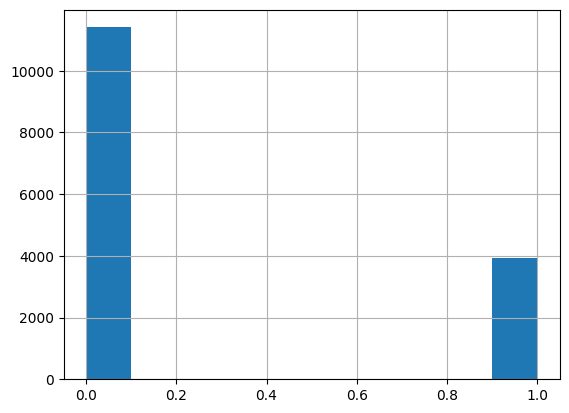

In [ ]:
target.hist()

**(1 балл)**
- Постройте гистограмму распределения признака "capital-gain" с количеством бинов=50
- Посмотрите процентное соотношение категорий в колонке "workclass"

<Axes: >

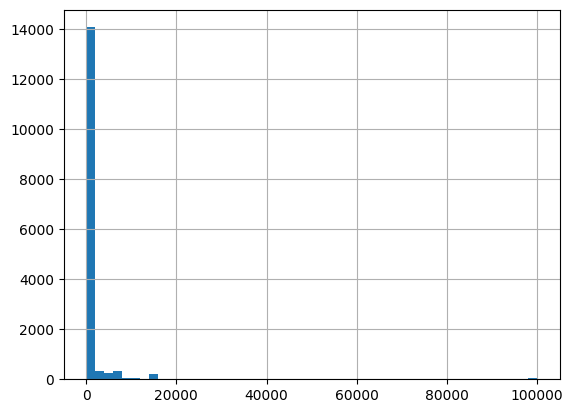

In [ ]:
# use df\['needed column'\].hist(bins=...), df\['needed column'\].value_counts
data_adult["capital-gain"].hist(bins=50)

Из гистограммы видно, что наибольшее количество людей с нулевым капиталом. Есть большое разброс - максимальный размер капитала сильно отличается от минимального

In [ ]:
data_adult['workclass'].value_counts(normalize=True)

Private             0.735127
Self-emp-not-inc    0.086271
Local-gov           0.069525
State-gov           0.042028
Self-emp-inc        0.036554
Federal-gov         0.030038
Without-pay         0.000456
Name: workclass, dtype: float64

Наибольшее количество значений "Private", наименьшее "Without-pay" 

### 2. Категориальные признаки

Как вы могли заметить, среди признаков есть категориальные.

**(1 балл)**
- Выделите 3 переменные (cat - список категориальных признаков, num - список вещественных признаков, target - таргет (строка));
- Закодируйте категориальные признаки;
- Выберите признаки для обучения.

Чтобы понять, какие признаки категориальные, используйте:
- df.dtypes,
- df\[col\].value_counts,
- df\[col\].nunique
- ...

In [ ]:
data_adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

Приведем в бинарный вид признак sex(Пол) 

In [ ]:
data_adult['sex'] = data_adult['sex'].map({'Male': 1, 'Female': 0})

Список вещественных признаков
---
Это признаки, имеющие числовой тип данных



In [ ]:
num = ['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss','hours-per-week']

Потом найдем категориальные признаки
---
Категориальные признаки не имеют численного представления, так что рассмотрим те признаки, которые имеют тип object 

In [ ]:
data_adult.nunique()

age                  72
workclass             7
fnlwgt            12065
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        105
capital-loss         81
hours-per-week       92
dtype: int64

In [ ]:
data_adult['workclass'].value_counts(normalize=True)

Private             0.735127
Self-emp-not-inc    0.086271
Local-gov           0.069525
State-gov           0.042028
Self-emp-inc        0.036554
Federal-gov         0.030038
Without-pay         0.000456
Name: workclass, dtype: float64

In [ ]:
data_adult['race'].value_counts(normalize=True)

White                 0.856519
Black                 0.094155
Asian-Pac-Islander    0.032384
Amer-Indian-Eskimo    0.009383
Other                 0.007558
Name: race, dtype: float64

In [ ]:
data_adult['relationship'].value_counts(normalize=True)

Husband           0.415521
Not-in-family     0.254577
Own-child         0.147846
Unmarried         0.102887
Wife              0.049391
Other-relative    0.029778
Name: relationship, dtype: float64

In [ ]:
cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
target_y = '>50K,<=50K'

In [ ]:
data_adult = pd.get_dummies(data_adult, columns=cat,drop_first= True)

In [ ]:
data_adult.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handle

In [ ]:
train_columns = data_adult.columns.difference(['sex', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'relationship', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed'])

In [ ]:
train_columns

Index(['age', 'capital-gain', 'capital-loss', 'education-num',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'fnlwgt', 'hours-per-week',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workc

In [ ]:
data_adult

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,34,284843,9,1,594,0,60,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,40,190290,10,1,0,0,40,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,36,177858,13,1,0,0,40,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,22,184756,10,0,0,0,30,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,47,149700,13,1,15024,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,25,514716,13,0,0,0,40,0,1,0,...,0,0,1,0,0,0,0,1,0,0
16276,32,207668,13,1,15024,0,45,0,0,1,...,0,0,0,0,0,0,0,0,0,1
16277,27,104457,13,1,0,0,40,0,0,1,...,1,0,0,0,0,0,1,0,0,0
16278,59,268700,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#.fit(data_adult[train_columns], data_adult[target]).

### 3. Нормализация данных

**(1 балл)**
- Проведите анализ шкал признаков (Какого порядка вещественные признаки?) Можно с помощью гистограммы.
- Напишите, к каким проблемам может привести разница в шкалах различных признаков.
- На какие алгоритмы машинного обучения может повлиять данная проблема и почему.
- На какие алгоритмы машинного обучения не влияет масштабирование данных.

'age' непрерывный признак, числа положительные

Числа от 10 до 90



<Axes: >

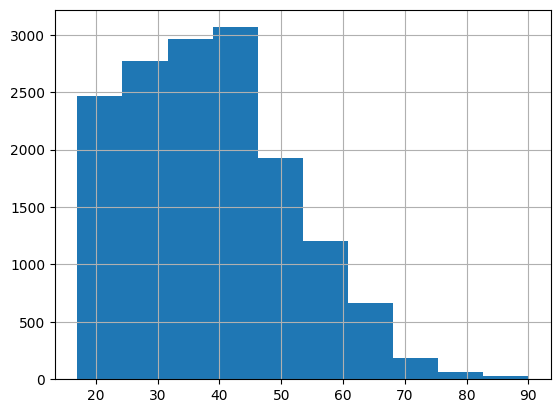

In [ ]:
data_adult['age'].hist()

'fnlwgt' непрерывный признак, положительный, но меньше единицы

<Axes: >

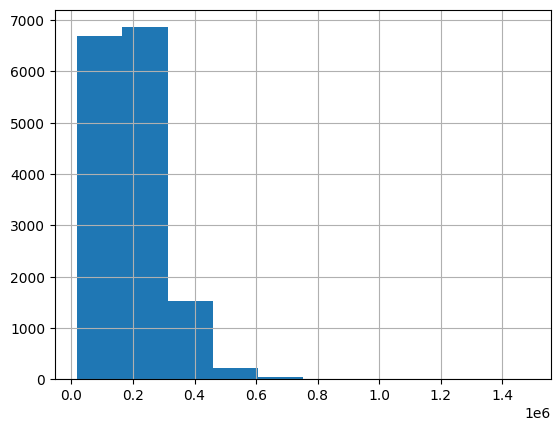

In [ ]:
data_adult['fnlwgt'].hist()

education-num- непрерывный, положительный признак. Максимум ближе к правомум концу гистограммы

<Axes: >

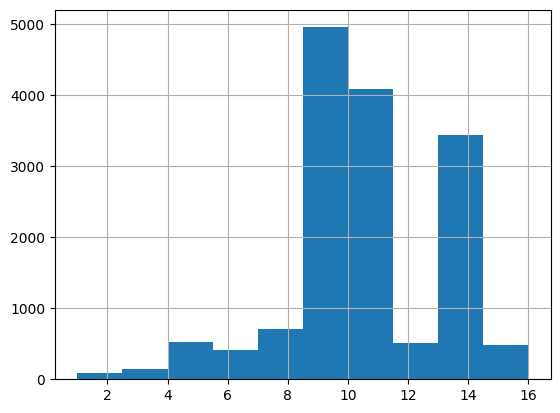

In [ ]:
data_adult['education-num'].hist()

sex - второй порядок, мужчин больше женщин

<Axes: >

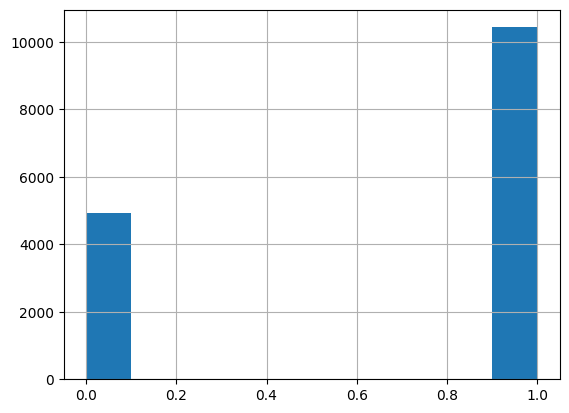

In [ ]:
data_adult['sex'].hist()

capital-gain - Непрерывный

<Axes: >

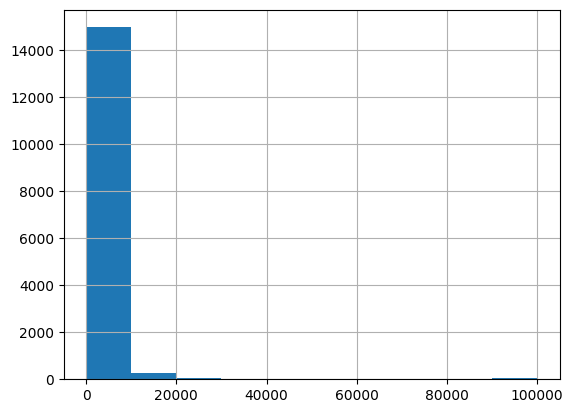

In [ ]:
data_adult['capital-gain'].hist()

Непрерывный

<Axes: >

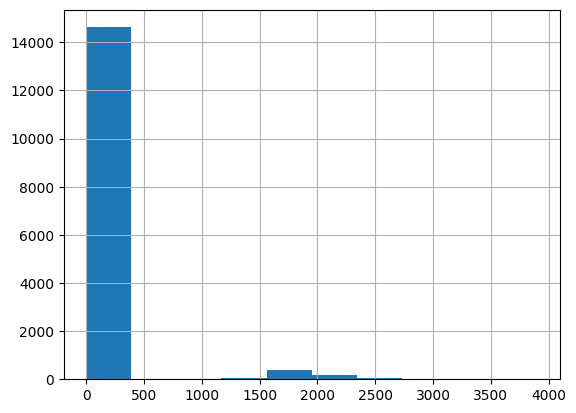

In [ ]:
data_adult['capital-loss'].hist()

Непрерывный

<Axes: >

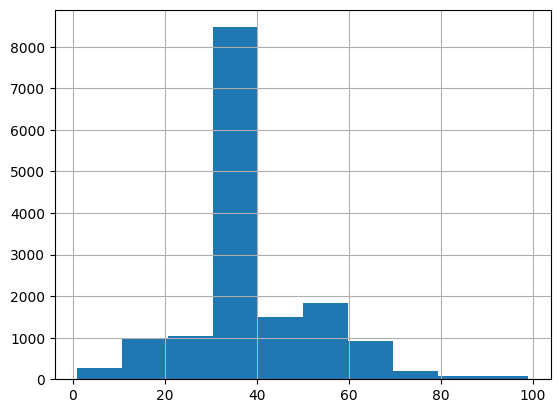

In [ ]:
data_adult['hours-per-week'].hist()

*Напишите, к каким проблемам может привести разница в шкалах различных признаков.*
Разница в шкалах гистограммы различных признаков может привести к тому, что признаки с большими числовыми значениями будут иметь более широкий диапазон значений на гистограмме, чем признаки с меньшими числовыми значениями. Это может привести к искажению визуального представления распределения данных и затруднить сравнение признаков между собой. Кроме того, различные шкалы могут затруднить применение некоторых статистических методов для анализа данных, таких как корреляционный анализ или регрессионный анализ. Поэтому важно использовать одинаковые шкалы для всех признаков при анализе данных
------
*На какие алгоритмы машинного обучения может повлиять данная проблема и почему.*
На алгоритмы машинного обучения,использующие расстояния между признаками - Случайный лес (Random Forest), K-ближайших соседей (k-NN), метод k-средних, иерархическая кластеризация. 

Если шкалы признаков различны, то расстояние между ними может быть искажено, что может привести к неправильной кластеризации данных. 

Кроме того, алгоритмы, которые используют линейную регрессию или логистическую регрессию, могут также быть затруднены при использовании признаков с разными шкалами, так как это может привести к искажению весов признаков и неправильной интерпретации результатов. Нужно учитывать проблему разницы в шкалах при выборе алгоритмов машинного обучения и предварительной обработке данных.
------
*На какие алгоритмы машинного обучения не влияет масштабирование данных.*
Большинство алгоритмов машинного обучения требуют масштабирования данных для достижения лучшей производительности и точности модели.

1. Random Forest (использует решающие деревья в качестве базовых моделей)

2. Решающие деревья (Decision Trees) (работают с пороговыми значениями признаков, а не с их абсолютными значениями)

3. Градиентный бустинг (использует решающие деревья в качестве базовых моделей)

4. Некоторые методы регрессии, такие как Линейная регрессия (Linear Regression), если используется регуляризация




**(1 балл)**
- Масштабируйте данные
- Выделите отдельно X (ваши признаки) и y - ваша колонка таргета

In [ ]:
print(target)

0        0
1        0
2        0
3        0
4        1
        ..
16275    0
16276    1
16277    0
16278    0
16279    1
Name: >50K,<=50K, Length: 15347, dtype: int64


In [ ]:
from sklearn.utils import threadpool_info


In [ ]:
#data_adult = data_adult.reindex(columns=train_columns)

In [ ]:
data_adult[train_columns]

,age,capital-gain,capital-loss,education-num,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,34,594,0,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,40,0,0,10,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,36,0,0,13,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,22,0,0,10,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,47,15024,0,13,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,25,0,0,13,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16276,32,15024,0,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16277,27,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16278,59,0,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


нормируем данные

In [ ]:
target

0        0
1        0
2        0
3        0
4        1
        ..
16275    0
16276    1
16277    0
16278    0
16279    1
Name: >50K,<=50K, Length: 15347, dtype: int64

In [ ]:
#target=target.reshape(-1, 1)

In [ ]:
target

0        0
1        0
2        0
3        0
4        1
        ..
16275    0
16276    1
16277    0
16278    0
16279    1
Name: >50K,<=50K, Length: 15347, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)

X = ss.fit_transform(data_adult[train_columns])


In [ ]:
X.shape

(15347, 40)

In [ ]:
y =target

In [ ]:
y.shape

(15347,)

Далее используйте масштабированные признаки

### 4. Валидация

В нашем случае будем валидироваться с помощью KFold + сохранение баланса классов в каждом "фолде" с помощью StratifiedKFold из sklearn.model_selection

**(1 балл)**

Расскажите:
- Какие виды валидации вы знаете?
- Какие минусы и плюсы каждого подхода к валидации?
- В чем преимущество StratifiedKFold над KFold?

Существует несколько видов валидации данных:
* K-fold cross-validation
* Hold-out cross-validation
* Stratified k-fold cross-validation
* Leave-p-out cross-validation
* Leave-one-out cross-validation
* Monte Carlo (shuffle-split)
* Time series (rolling cross-validation)

Также есть такая классификация видов:

1. Валидация типов данных: проверка соответствия типов данных в колонках с ожидаемыми типами данных.

2. Валидация диапазона значений: проверка того, что значения в колонках находятся в ожидаемом диапазоне.

3. Валидация формата данных: проверка соответствия формата данных в колонках заданным правилам.

4. Валидация уникальности: проверка того, что значения в колонках являются уникальными.

5. Валидация отсутствия пропущенных значений: проверка того, что в колонках отсутствуют пропущенные значения.

6. Валидация связанных данных: проверка того, что значения в различных колонках связаны между собой.
---

***K-fold cross-validation***:

"+" Может использовать все данные для обучения и тестирования модели

"+" Усредняет результаты оценки модели на различных выборках -> малая вероятность переобучения

"+" Может оценить стабильность модели на различных выборках

"-" Может быть затратным по времени и вычислительным ресурсах (при большом количестве фолдов)

"-" Может привести к переобучению, если не учитывать особенности данных при разбиении на фолды

"-" Не гарантирует сохранение пропорций классов в каждом из фолдов, что может привести к неправильной оценке модели в случаях, когда классы не сбалансированы
---

***Hold-out cross-validation***

"+" Простая реализации

"+" Может быть быстрее, чем K-fold cross-validation при использовании только одного разбиения на обучающую и тестовую выборки

"+" Позволяет оценить качество модели на независимых данных.

"-" Не использует все данные для обучения и тестирования модели.

"-" Результаты могут сильно зависеть от случайного разбиения на обучающую и тестовую выборки.

"-" Может привести к переобучению, если не учитывать особенности данных при разбиении на обучающую и тестовую выборки.

***Stratified k-fold cross-validation***

"+" Учитывает баланс классов в данных при разбиении на обучающую и тестовую выборки.

"+" Использует все данные для обучения и тестирования модели.

"+" Результаты более стабильны, чем при Hold-out cross-validation.

"-" Может быть медленее, чем Hold-out cross-validation при использовании большого количества разбиений на обучающую и тестовую выборки.

"-" Может быть менее точным, если классы несбалансированные.

***Leave-p-out cross-validation***

"+" Использует все данные для обучения и тестирования модели.

"+" Может оценить стабильность модели, так как каждый объект данных будет использоваться в качестве тестовой выборки.

"+" Может оценить влияние каждого объекта данных на обучение модели.

"-" Может быть медленыным (при большом значении p)

"-" Может дать неустойчивые результаты, если выборка слишком мала или сильно несбалансирована.

"-" Может дать неочевидные результаты, если объекты данных коррелируют между собой.

***Leave-one-out cross-validation***

"+" Использует все данные для обучения и тестирования модели.

"+" Позволяет оценить стабильность модели, так как каждый объект данных будет использоваться в качестве тестовой выборки.

"+" Позволяет оценить влияние каждого объекта данных на обучение модели.

"+" Может дать более точные результаты, чем другие методы кросс-валидации, 
особенно при большом объеме данных.

"-" Может быть очень медленным, особенно при большом объеме данных.

"-" Может дать неустойчивые результаты, если выборка слишком мала или сильно несбалансирована.

"-" Может дать неочевидные результаты, если объекты данных коррелируют между собой.

***Monte Carlo (shuffle-split)***

"+" Позволяет гибко настраивать размеры тестовой и обучающей выборок.

"+" Может быть быстрее, чем leave-one-out, особенно при большом объеме данных.

"+" Может дать более устойчивые результаты, чем leave-one-out, если выборка несбалансирована или содержит выбросы.

"+" Позволяет оценить обобщающую способность модели на новых данных.

"-" Не использует все данные для обучения и тестирования модели, что может привести к уменьшению точности оценки.

"-" Результаты могут зависеть от случайного разбиения выборки на обучающую и тестовую.

"-" Может дать неочевидные результаты, если объекты данных коррелируют между собой.

*** Time series (rolling cross-validation)***

"+" Учитывает временную зависимость данных, что позволяет более точно оценивать обобщающую способность модели в реальных условиях.

"+" Использует все доступные данные для обучения и тестирования модели, что позволяет получить более точные оценки.

"+" Позволяет определить, насколько хорошо модель может прогнозировать будущие значения.

"-" Может быть медленнее, чем Monte Carlo или K-fold, особенно при большом объеме данных.

"-" Требует строгого соблюдения временной последовательности данных, что может быть затруднительно при отсутствии явной временной структуры.

"-" Может дать неочевидные результаты, если временные ряды имеют сильные колебания или нестационарность.

StratifiedKFold - это улучшенная версия K-Fold

StratifiedKFold является более предпочтительным относительно KFold в случаях, когда классы в целевой переменной не сбалансированы. StratifiedKFold сохраняет пропорции классов в каждом из фолдов, что уменьшает вероятность перекоса в обучающих и тестовых данных. В то же время, KFold не гарантирует сохранение пропорций классов и может привести к неправильной оценке модели. Когда мы имеем дело с классификационной проблемой распределения классов дисбаланса, мы должны использовать StratifiedKFold.

### 5. Выбор алгоритма и оптимизация

При подборе алгоритма будем варьировать не один параметр, а несколько в каждом алгоритме.

Выберем 3 алгоритма:

 - kNN (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))
 - SGD Linear Classifier (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html))
 - RandomForest (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))
 

### 5.1 kNN

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами).
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10). 
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Число соседей (**n_neighbors**) Перебирайте в диапазоне от 0 до 50.
- Метрика (**metric**) Перебирайте из \['minkowski', 'euclidean', 'chebyshev', 'manhattan'\].

Если подбор занимает очень много времени:
* Задайте значение параметра n_jobs=-1.
* Перебирайте значения из диапазона с шагом 2-5.

Для построения графика зависимости качества модели от показателя metric по оси идут 4 категории метрики. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold

In [ ]:
model = KNeighborsClassifier() #модель с дефолтными параметрами

params = {'n_neighbors': range(0,50, 2), 'metric': ['minkowski', 'euclidean', 'chebyshev', 'manhattan']}
#params_metric={]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc', n_jobs=-1)


In [ ]:
GS_kNN.fit(X=X, y=y)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'chebyshev',
                                    'manhattan'],
                         'n_neighbors': range(0, 50, 2)},
             scoring='roc_auc')

Лучшие параметры модели

In [ ]:
GS_kNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 46}

вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации

In [ ]:
GS_kNN.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=46)

In [ ]:
GS_kNN

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'chebyshev',
                                    'manhattan'],
                         'n_neighbors': range(0, 50, 2)},
             scoring='roc_auc')

Построим графики

In [ ]:
GS_kNN.cv_results_['params'][75:100:1]

[{'metric': 'manhattan', 'n_neighbors': 0},
 {'metric': 'manhattan', 'n_neighbors': 2},
 {'metric': 'manhattan', 'n_neighbors': 4},
 {'metric': 'manhattan', 'n_neighbors': 6},
 {'metric': 'manhattan', 'n_neighbors': 8},
 {'metric': 'manhattan', 'n_neighbors': 10},
 {'metric': 'manhattan', 'n_neighbors': 12},
 {'metric': 'manhattan', 'n_neighbors': 14},
 {'metric': 'manhattan', 'n_neighbors': 16},
 {'metric': 'manhattan', 'n_neighbors': 18},
 {'metric': 'manhattan', 'n_neighbors': 20},
 {'metric': 'manhattan', 'n_neighbors': 22},
 {'metric': 'manhattan', 'n_neighbors': 24},
 {'metric': 'manhattan', 'n_neighbors': 26},
 {'metric': 'manhattan', 'n_neighbors': 28},
 {'metric': 'manhattan', 'n_neighbors': 30},
 {'metric': 'manhattan', 'n_neighbors': 32},
 {'metric': 'manhattan', 'n_neighbors': 34},
 {'metric': 'manhattan', 'n_neighbors': 36},
 {'metric': 'manhattan', 'n_neighbors': 38},
 {'metric': 'manhattan', 'n_neighbors': 40},
 {'metric': 'manhattan', 'n_neighbors': 42},
 {'metric': 'ma

In [ ]:
GS_kNN.cv_results_['mean_test_score']

array([       nan, 0.72254048, 0.76276924, 0.78074093, 0.79150071,
       0.79748495, 0.80233734, 0.80537644, 0.80681534, 0.80787496,
       0.80889153, 0.81024902, 0.81120614, 0.81241687, 0.81330908,
       0.81442283, 0.81489098, 0.81479367, 0.81412709, 0.81383243,
       0.81402242, 0.81348108, 0.81297832, 0.81243637, 0.81211425,
              nan, 0.72254048, 0.76276924, 0.78074093, 0.79150071,
       0.79748495, 0.80233734, 0.80537644, 0.80681534, 0.80787496,
       0.80889153, 0.81024902, 0.81120614, 0.81241687, 0.81330908,
       0.81442283, 0.81489098, 0.81479367, 0.81412709, 0.81383243,
       0.81402242, 0.81348108, 0.81297832, 0.81243637, 0.81211425,
              nan, 0.71666864, 0.75657316, 0.77449428, 0.78529461,
       0.79094881, 0.79423367, 0.79559867, 0.79808774, 0.79965529,
       0.79953558, 0.80133192, 0.80053244, 0.8005552 , 0.80104213,
       0.80080438, 0.80138063, 0.80079629, 0.80003081, 0.80090565,
       0.7997466 , 0.7994021 , 0.7997976 , 0.79893869, 0.79804

По оси икс будут наши параметры - в первом случае количестов соседей, во втором название метрик (4 штуки). По оси y значения roc-auc для каждого из параметров

В cvresults есть словарь params, это какие параметры брались в i-Ом эксперименте и соответствуют i-ым значениям в mean_test_score и std_test_score. Чтобы построить график, например, для metric зафиксируйте значение параметра n_neighbours, который равен n_neighbours из best_params. 

В массиве params записаны параметры каждого эксперимента, в массиве mean_test_score среднее значение roc auc на k-1 фолдах, в std_test_score СКО. Каждой i -ой комбинации параметров соответствует i-ый средний скор в mean_test_score и СКО в std_test_score

In [ ]:
res1=GS_kNN.cv_results_['mean_test_score'][24::25]#На этом шаге лучшее значение n_neighbors
res1

array([0.81211425, 0.81211425, 0.79804859, 0.81553444])

In [ ]:
res_neighbor=GS_kNN.cv_results_['mean_test_score'][76:100:1]#
res_neighbor

array([0.71981697, 0.76004616, 0.78138608, 0.79137093, 0.79821024,
       0.80324549, 0.8063633 , 0.80875891, 0.81038189, 0.81194806,
       0.81269226, 0.81346692, 0.81390907, 0.81484716, 0.81440062,
       0.81611992, 0.81633983, 0.81696022, 0.81695988, 0.81682833,
       0.81669907, 0.81621785, 0.81580942, 0.81553444])

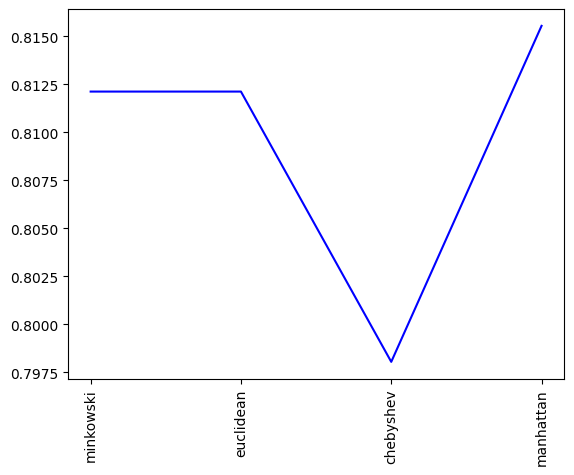

In [ ]:
import pylab as pl
x_kNN = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
res_metric=GS_kNN.cv_results_['mean_test_score'][24::25]#На этом шаге лучшее значение n_neighbors=46

xTicks = ['minkowski', 'euclidean', 'chebyshev', 'manhattan']
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(4), xTicks, rotation='vertical')
pl.plot(range(4), res_metric, color='blue')

Зафиксируем теперь метрику

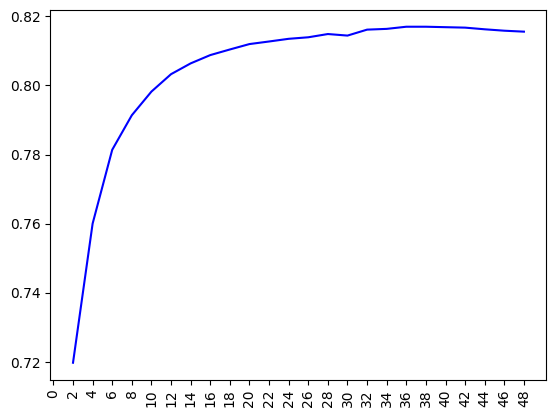

In [ ]:
import pylab as pl
res_neighbor=GS_kNN.cv_results_['mean_test_score'][75:100:1]#На этом шаге лучшее значение manhattan

xTicks1 = range(0,50, 2)
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(0,50, 2), xTicks1, rotation='vertical')
pl.plot(range(0,50, 2), res_neighbor, color='blue')

### 5.2 SGD Linear Classifier

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами)
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10). 
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Loss функция (**loss**) Перебирайте из \['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive'\]
- Вид штрафа (**penalty**) Перебирайте из \['none', 'l2', 'l1', 'elasticnet'\]


Для построения графика зависимости качества модели от показателей loss, penalty по оси "x" идут категории. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model2 = SGDClassifier() #модель с дефолтными параметрами

params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive'], 'penalty': ['none', 'l2', 'l1', 'elasticnet']}

cv = StratifiedKFold(shuffle=True, n_splits=5)

GS_SGD = GridSearchCV(estimator=model2, param_grid=params, cv=cv, scoring='roc_auc', n_jobs=-1)

In [ ]:
GS_SGD.fit(X=X, y=y)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 891, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron', 'squared_loss',
                                  'huber', 'epsilon_insensitive'],
                         'penalty': ['none', 'l2', 'l1', 'elasticnet']},
             scoring='roc_auc')

In [ ]:
GS_SGD.best_params_

{'loss': 'log', 'penalty': 'l1'}

In [ ]:
GS_SGD.best_estimator_

SGDClassifier(loss='log', penalty='l1')

In [ ]:
GS_SGD.best_score_

0.8331997128755427

In [ ]:
GS_SGD.cv_results_['params'][4:8:]

[{'loss': 'log', 'penalty': 'none'},
 {'loss': 'log', 'penalty': 'l2'},
 {'loss': 'log', 'penalty': 'l1'},
 {'loss': 'log', 'penalty': 'elasticnet'}]

In [ ]:
GS_SGD.cv_results_['mean_test_score'][2::4]

array([0.82237977, 0.83002777, 0.80541064, 0.76877212, 0.7209972 ,
              nan, 0.7826079 , 0.74422578])

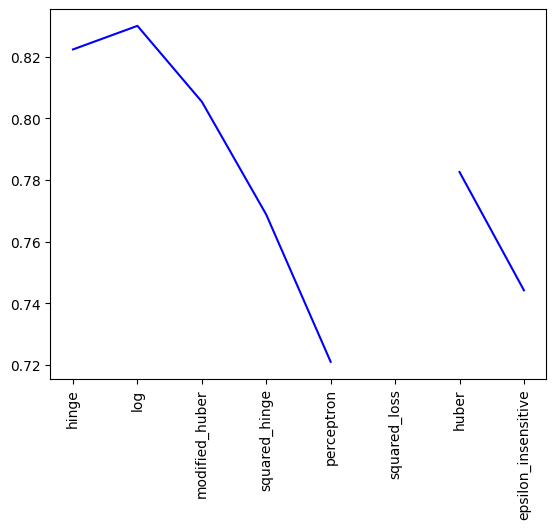

In [ ]:
import pylab as pl
res_loss=GS_SGD.cv_results_['mean_test_score'][2::4]#На этом шаге лучшее значение penalty='l1'

xTicks2 = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive']
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(8), xTicks2, rotation='vertical')
pl.plot(range(8), res_loss, color='blue')

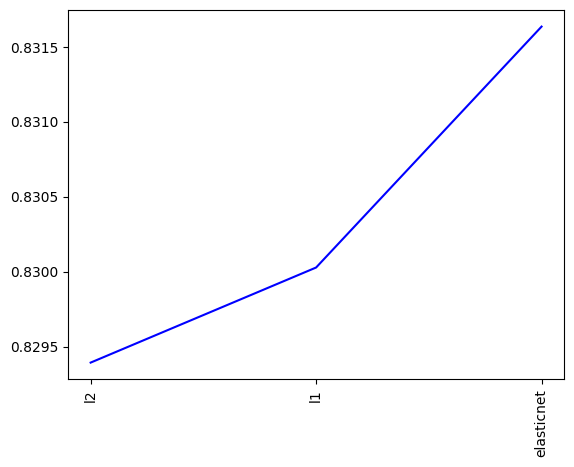

In [ ]:
import pylab as pl
res_penalty=GS_SGD.cv_results_['mean_test_score'][4:8:]#На этом шаге лучшее значение 'loss': 'log'

xTicks3 = ['none', 'l2', 'l1', 'elasticnet']
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(len(xTicks3)), xTicks3, rotation='vertical')
pl.plot(range(len(xTicks3)), res_penalty, color='blue')

### 5.3 RandomForestClassifier

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами).
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10). 
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Число деревьев (**n_estimators**) Перебирайте в диапазоне от 0 до 100
- Параметр максимального количества фичей для построения дерева (**max_features**) Перебирайте из \['auto', 'sqrt', 'log2', None\]
- Критерий разбиения на поддеревья (**criterion**) Перебирайте из \['gini', 'entropy'\]


Для построения графика зависимости качества модели от показателей max_features, criterion по оси "x" идут категории. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

#### Важно!!!

Число деревьев (**n_estimators**) перебирать с помощью GridSearchCV НЕ НАДО!

Если задание ниже не получится (можете по-старинке перебирать (но придется долго ждать))

**(2 балла)**

Подберём число деревьев (n_estimators) в алгоритме RandomForest, начиная с которого качество стабилизируется. Выполните задание одним из предложенных способов (можете сделать двумя, а потом сравнить их результаты).

_Способ 1_
1. Разбейте выборку на обучающую и тестовую с помощью train_test_split.
2. Для каждого числа деревьев:
  - Обучите модель на обучающей выборке
  - Посчитайте скор на тестовой выборке
  - Сохраните скор
3. Проанализируйте зависимость качества предсказания модели от числа деревьев (постройте график).
4. Напишите какое оптимальное количество деревьев следует использовать и почему.

_Способ 2_
1. Для каждого числа деревьев:
  - Посчитайте скор, используя cross_val_score
  - Сохраните скор
3. Проанализируйте зависимость качества предсказания модели от числа деревьев (постройте график).
4. Напишите какое оптимальное количество деревьев следует использовать и почему.

В дальнейших экспериментах используйте подобранное количество деревьев.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

#### Сначала подберите оптимальное количество деревьев, зафиксируйте, затем другие параметры.

In [ ]:
max_trees_number = 100
result = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42) # для способа 1
#разбить выборку
arr_score=[]
for current_trees_number in range(1,max_trees_number):
    # инициализируем модель
    RFC_model = RandomForestClassifier(n_estimators=current_trees_number)
    # обучаем модель
    RFC_model.fit(X_train, y_train)
    # считаем скор
    arr_score.append(RFC_model.score(X_test, y_test)) #Возвращает среднюю точность по заданным тестовым данным и меткам.
    # сохраняем скор
    #print(RFC_model.score(X_test, y_test))

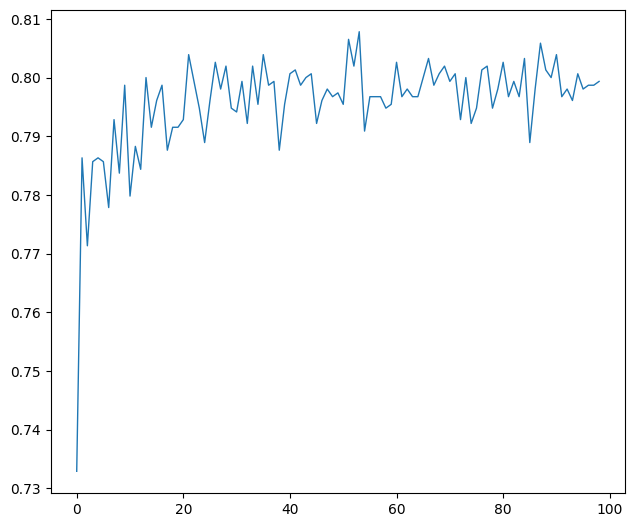

In [ ]:
import matplotlib.pyplot as plt

# График
fig = plt.figure(figsize=(12, 10), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(arr_score)), arr_score, linewidth = 1)

In [ ]:
print(max(arr_score))

0.8078175895765473


Нам будет нужен наилучший показатель

In [ ]:
arr_score.index(max(arr_score))

53

In [ ]:
n_estimators=54 #массив с нуля идет

In [ ]:
model = RandomForestClassifier(n_estimators=54) #модель с дефолтными параметрами

params = {'n_estimators': range(100), 'max_features': ['auto', 'sqrt', 'log2', None], 'criterion': ['gini', 'entropy']}

cv = StratifiedKFold(shuffle=True, n_splits=5)

GS_RFC = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc', n_jobs=-1)

Подбор n_estimators долгим способом дал число 92

In [ ]:
GS_RFC.fit(X=X, y=y)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_p

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=54), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': range(0, 100)},
             scoring='roc_auc')

In [ ]:
GS_RFC.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=92)

In [ ]:
GS_RFC.best_params_

{'criterion': 'entropy', 'max_features': None, 'n_estimators': 92}

In [ ]:
GS_RFC.best_score_

0.8406713339963264

In [ ]:
GS_RFC.cv_results_

{'mean_fit_time': array([9.40814018e-03, 3.58194828e-02, 5.80929279e-02, 7.51579762e-02,
        1.10198545e-01, 1.24914312e-01, 1.38990259e-01, 1.58306742e-01,
        1.86333179e-01, 1.99865055e-01, 2.27977085e-01, 2.46549559e-01,
        2.69324446e-01, 2.87544775e-01, 3.06866503e-01, 3.24359703e-01,
        3.52267885e-01, 3.67860222e-01, 7.25740528e-01, 6.68534231e-01,
        4.38503790e-01, 4.57569218e-01, 4.89437008e-01, 5.02431345e-01,
        5.16647339e-01, 5.45062590e-01, 5.75337696e-01, 9.88810825e-01,
        7.91422367e-01, 6.25909424e-01, 6.45121861e-01, 6.70849371e-01,
        6.85305357e-01, 7.29892540e-01, 1.28833184e+00, 7.91993618e-01,
        7.76428938e-01, 7.97696161e-01, 8.29428053e-01, 9.63196659e-01,
        1.31614180e+00, 8.70472383e-01, 9.14841604e-01, 9.23528099e-01,
        1.11788011e+00, 1.37284765e+00, 9.78924322e-01, 1.01769090e+00,
        1.02553549e+00, 1.62680211e+00, 1.09669299e+00, 1.09685922e+00,
        1.12245073e+00, 1.69632797e+00, 1.20198

In [ ]:
y_pred=GS_RFC.predict(X)

In [ ]:
import pylab as pl
x_RFC = ...
xTicks = [...]
# rotation - поварьируйте (это угол поворота названий категорий гиперпараметров)
pl.xticks(range(...), xTicks, rotation=...)
pl.plot(x_RFC, ..., color=...)

In [ ]:
...

### 6. Ансамбль моделей

это метод машинного обучения, который объединяет несколько моделей для улучшения качества прогнозирования. Вместо использования одной модели, ансамбль моделей использует комбинацию нескольких моделей, чтобы получить более точные и надежные прогнозы. Ансамбль моделей может быть построен на основе различных алгоритмов машинного обучения, таких как случайный лес, градиентный бустинг и стекинг. Каждая модель в ансамбле может иметь свои сильные и слабые стороны, но в целом ансамбль моделей может дать лучший результат, чем любая из отдельных моделей.

**(2 балла)**

Попробуйте "заблендить" модели (сложить результаты (ответы) разных алгоритмов) с разными коэффициентами перед ними.

Попробуйте различные комбинации алгоритмов. А так же все три алгоритма вместе.

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

Подробнее про ансамбли: [здесь](https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/)

Простой пример использования VotingClassifier и его описание можно найти в официальной документации: [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) 


In [ ]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier

In [ ]:
kNN_model = KNeighborsClassifier(metric='manhattan', n_neighbors=46)
SGD_model = SGDClassifier(loss='log', penalty='l1')
RFC_model = RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=92)

In [ ]:
# Передаем в VotingClassifier наши модели для ансамбля
vc = VotingClassifier([('kNN', kNN_model), ('SGD',SGD_model),('RFC',RFC_model)], voting='soft')

In [ ]:
cv = StratifiedKFold(shuffle=True, n_splits=9)

In [ ]:
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации
grid = GridSearchCV(estimator=vc,
                    param_grid={'weights': [[i, 1 - i, 2-i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

GridSearchCV(cv=StratifiedKFold(n_splits=9, random_state=None, shuffle=True),
             estimator=VotingClassifier(estimators=[('kNN',
                                                     KNeighborsClassifier(metric='manhattan',
                                                                          n_neighbors=46)),
                                                    ('SGD',
                                                     SGDClassifier(loss='log',
                                                                   penalty='l1')),
                                                    ('RFC',
                                                     RandomForestClassifier(criterion='entropy',
                                                                            max_features=None,
                                                                            n_estimators=92))],
                                        voting='soft'),
             param_grid={'weights': [[0.0, 1.0, 2.0], [0.1, 0.9, 1.9],
                                     [0.2, 0.8, 1.8],
                                     [0.30000000000000004, 0.7, 1.7],
                                     [0.4, 0.6, 1.6], [0.5, 0.5, 1.5],
                                     [0.6000000000000001, 0.3999999999999999,
                                      1.4],
                                     [0.7000000000000001, 0.29999999999999993,
                                      1.2999999999999998],
                                     [0.8, 0.19999999999999996, 1.2],
                                     [0.9, 0.09999999999999998, 1.1],
                                     [1.0, 0.0, 1.0]]},
             scoring='roc_auc')

In [ ]:
grid.best_estimator_

VotingClassifier(estimators=[('kNN',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=46)),
                             ('SGD', SGDClassifier(loss='log', penalty='l1')),
                             ('RFC',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=None,
                                                     n_estimators=92))],
                 voting='soft', weights=[0.5, 0.5, 1.5])

In [ ]:
grid.best_score_

0.8534519305853452

Результат получился лучше чем по отдельности

### 7. Ящик с усами

**(2 балла)**

Давайте посмотрим визуально на качество наших моделей. Вы уже знаете, какие гиперпараметры для наших моделей являются наилучшими. Зафиксируйте данные параметры:

In [ ]:
best_model_knn = GS_kNN.best_params_ # Можно ручками или через .best_params_ или .best_model_
best_model_random_forest = GS_RFC.best_params_  # Можно ручками или через .best_params_ или .best_model_
best_model_sgd =GS_SGD.best_params_  # Можно ручками или через .best_params_ или .best_model_
best_model_voting_classifier = grid.best_params_

Посмотрим на наше качество на кросс_валидации:

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# В качестве cv возьмите StratifiedKFold с 7 фолдами
cv_score_knn = cross_val_score(estimator=KNeighborsClassifier(), X=X, y=y, cv=StratifiedKFold(shuffle=True, n_splits=7), scoring='roc_auc')
cv_score_random_forest = cross_val_score(estimator=RandomForestClassifier(n_estimators=54), X=X, y=y,  cv=StratifiedKFold(shuffle=True, n_splits=7), scoring='roc_auc')
cv_score_sgd = cross_val_score(estimator=SGDClassifier(), X=X, y=y,  cv=StratifiedKFold(shuffle=True, n_splits=7), scoring='roc_auc')
cv_score_voting_classifier = cross_val_score(estimator=vc, X=X, y=y,  cv=StratifiedKFold(shuffle=True, n_splits=7), scoring='roc_auc')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

In [ ]:
cv_score_knn

array([0.76319291, 0.76977683, 0.77952468, 0.76833395, 0.78268659,
       0.78263316, 0.7734703 ])

In [ ]:
cv_score_random_forest

array([0.82742756, 0.83003792, 0.83147196, 0.82705554, 0.83049512,
       0.83050603, 0.84296286])

In [ ]:
cv_score_sgd

array([0.79965457, 0.81994464, 0.82391112, 0.7836026 , 0.81957461,
       0.78949153, 0.81967274])

In [ ]:
cv_score_voting_classifier=np.ravel(cv_score_voting_classifier)
cv_score_voting_classifier.shape

(7,)

In [ ]:
cv_score_voting_classifier

array([0.85196853, 0.84464852, 0.86072802, 0.84423837, 0.85377052,
       0.8693169 , 0.84984958])

Создайте таблицу pandas.DataFrame с колонками названиями методов (4 колонки), а значения - выход функции cross_val_score

In [ ]:
data_final = {'cv_score_knn': [cv_score_knn],
        'cv_score_random_forest': [cv_score_random_forest], 
        'cv_score_sgd': [cv_score_sgd] ,
        'cv_score_voting_classifier': [cv_score_voting_classifier]}

In [ ]:
final_result_ = pd.DataFrame(data_final)

In [ ]:
data_box = np.array([np.ravel(cv_score_knn).T, np.ravel(cv_score_random_forest).T, np.ravel(cv_score_sgd).T, cv_score_voting_classifier.T]).T
final_result = pd.DataFrame(data_box, columns=['cv_score_knn', 'cv_score_random_forest', 'cv_score_sgd', 'cv_score_voting_classifier'])

In [ ]:
final_result

,cv_score_knn,cv_score_random_forest,cv_score_sgd,cv_score_voting_classifier
0,"[0.7631929082805742, 0.7697768309559873, 0.779...","[0.8274275626845666, 0.8300379213024006, 0.831...","[0.7996545674465233, 0.8199446436160359, 0.823...","[0.8519685296777779, 0.8446485196526059, 0.860..."


Запустите код ниже

In [ ]:
data_box.shape

(7, 4)

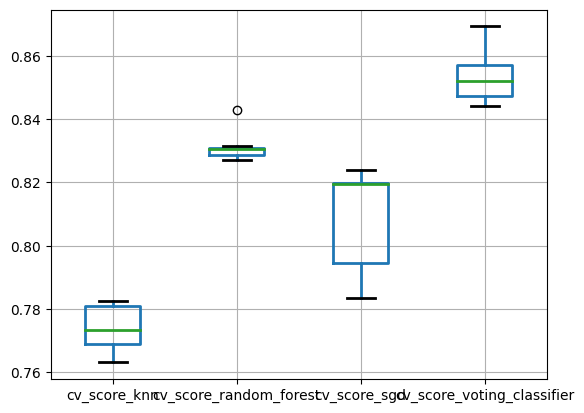

In [ ]:
ax = final_result.boxplot() 
_ = plt.setp(ax.lines, linewidth=2.0)
plt.show()

На графике boxplot ось x представляет данные, которые мы собираемся отобразить, а ось y - частоту.

На прямоугольном графике создается прямоугольник от первого квартиля до третьего квартиля, также присутствует вертикальная линия, которая проходит через прямоугольник по медиане. Усики отходят от краев рамки, чтобы показать диапазон данных.

Наименьшая частота у RandomForectClassifier, но в нем есть выброс, наибольшая - SGD 

1. Медиана (линия внутри коробки) - это значение, которое делит данные на две равные части. 

2. Коробка - это интерквартильный диапазон (IQR), который содержит 50% данных. Он строится между первым и третьим квартилями.

3. Усы - это линии, которые выходят из коробки и представляют минимальное и максимальное значение данных, не являющихся выбросами.

4. Выбросы - это значения данных, которые находятся за пределами усов и отображаются как точки на графике.

Интерпретация boxplot зависит от того, какие данные анализируем. Например, если коробка находится ближе к нижнему усу, это означает, что большинство данных находятся в нижней части диапазона, а если коробка находится ближе к верхнему усу, это означает, что большинство данных находятся в верхней части диапазона. Выбросы могут указывать на необычные значения данных, которые могут быть результатом ошибки или выброса.

визуализировать различия в качестве алгоритма на разных наборах данных и выявить возможные проблемы в алгоритме.

### 8. Выводы

**(1 балл)**
По графику выше сделайте вывод:
- Какой алгоритм "победил в соревновании" за качество?
- Лучший алгоритм с точки зрения качества/скорости работы (иногда это очень важно)
- Опишите каждый алгоритм (вкратце), его плюсы и минусы

За качество победил последний алгоритм - voting
_____

По времени выполнения дольше всех выполнялася RandomForest, быстрее - kNN_____


_____
kNN

Найти евклидово расстояние до всех выборок обучающих данных

Сохранить расстояния в упорядоченном списке и отсортироваить его

Выбрать первые K записей из отсортированного списка

Обозначить тестовую точку на основе большинства классов, присутствующих в выбранных точках - тех данных которых больше рядом

**"+"**

*Это легко понять и просто реализовать
* может быть использован как для задач классификации, так и для задач регрессии
* идеально подходит для нелинейных данных, поскольку нет никаких предположений относительно базовых данных
* может обрабатывать многоклассовые случаи
* может хорошо работать при наличии достаточного количества репрезентативных данных

**"-"**

* Связанные с этим вычислительные затраты высоки, поскольку в нем хранятся все обучающие данные
* Требуется большой объем оперативной памяти
* Необходимо определить значение K
* Прогнозирование выполняется медленно, если значение N велико
* Чувствителен к нерелевантным функциям


_____
SGD Linear Classifier

Реализует простую процедуру обучения стохастическому градиентному спуску, которая поддерживает различные функции потерь и штрафы за классификацию.

**"+"**
* Эффективность
* Простота реализации (множество возможностей для настройки кода).
**"-"**
* требует наличия ряда гиперпараметров(например, параметр регуляризации и количество итераций)
* SGD чувствителен к масштабированию
---

RandomForest 

RandomForest состоит из множества деревьев принятия решений. 

Алгоритм устанавливает результат на основе предсказаний деревьев решений. Он прогнозирует, беря среднее значение выходных данных из различных деревьев. Увеличение количества деревьев повышает точность результата.

Случайный лес устраняет ограничения алгоритма дерева решений. Это уменьшает переобучение наборов данных и повышает точность. 

**"+"**
* может выполнять как задачи регрессии, так и задачи классификации.
* дает хорошие прогнозы, которые легко понять.
* может эффективно обрабатывать большие наборы данных.
* обеспечивает более высокий уровень точности прогнозирования результатов по сравнению с алгоритмом дерева решений.

**"-"**
* для вычислений требуется больше ресурсов.
* занимает больше времени по сравнению с алгоритмом дерева решений.